
# No Show Appointments-kagglev2-may-2016.csv


<a id='intro'></a>
## Introduction

### Dataset Description 

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

    1-‘ScheduledDay’ tells us on what day the patient set up their appointment.
    2-‘Neighborhood’ indicates the location of the hospital.
    3-‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
    Be careful about the encoding of the last column: it says ‘No’ if the patient showed up to their appointment, and ‘Yes’ if they did not show up. 


### Question(s) for Analysis
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment?

In [1]:

import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline



<a id='wrangling'></a>
## Data Wrangling
Checking the data and cleaning it.


In [336]:
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [337]:
#data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [338]:
#data shape
df.shape

(110527, 14)

There is no missing values


### Data Cleaning
> **Tip**: Make sure that you keep your reader informed on the steps that you are taking in your investigation. Follow every code cell, or every set of related code cells, with a markdown cell to describe to the reader what was found in the preceding cell(s). Try to make it so that the reader can then understand what they will be seeing in the following cell(s).
 

In [339]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
# Unique Values .. 
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

In [340]:
#name corrections 
df.rename(columns={"Hipertension":"Hypertension"}, inplace=True)

In [341]:
#finding duplicates
sum(df["PatientId"].duplicated())

48228

In [342]:
#show count
shown = sum(df["No-show"]=="No")
shown

88208

In [343]:
#no show count
not_shown = sum(df["No-show"]=="Yes")
not_shown

22319

In [344]:
# Data statistics 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


I found that the min age is -1 so we will drop the row

In [345]:
age_to_drop = df.query('Age == "-1"')
age_to_drop


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [346]:
#droping data 
df.drop(index=99832, inplace=True)

In [347]:
#Checking Data
print(df.shape)
df.info()

(110526, 14)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null int64
Hypertension      110526 non-null int64
Diabetes          110526 non-null int64
Alcoholism        110526 non-null int64
Handcap           110526 non-null int64
SMS_received      110526 non-null int64
No-show           110526 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 12.6+ MB


In [348]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [349]:
#we should drop the Patient with the same ID and the same no-show status 
df.drop_duplicates(["PatientId","No-show"], inplace = True)

In [350]:
df.shape

(71816, 14)

In [351]:
#removing unnecessary columns
df.drop(["PatientId", "AppointmentID","ScheduledDay","AppointmentDay"], axis=1, inplace = True)


In [352]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


# Data Wrangling & Cleaning Summary:
After I checked the data I found that there is Patient IDs and Status duplicates so I removed it from the data, I found miss spilling for hypertention column so I corrected it and when I get described statistics for the data I found the min age is -1 so I removed the row so It doesn't interfere with the final results.

After General Visualization look I found unnecessary column so I removed it to have a better look.


<a id='eda'></a>
## Exploratory Data Analysis


# (General Visualization)

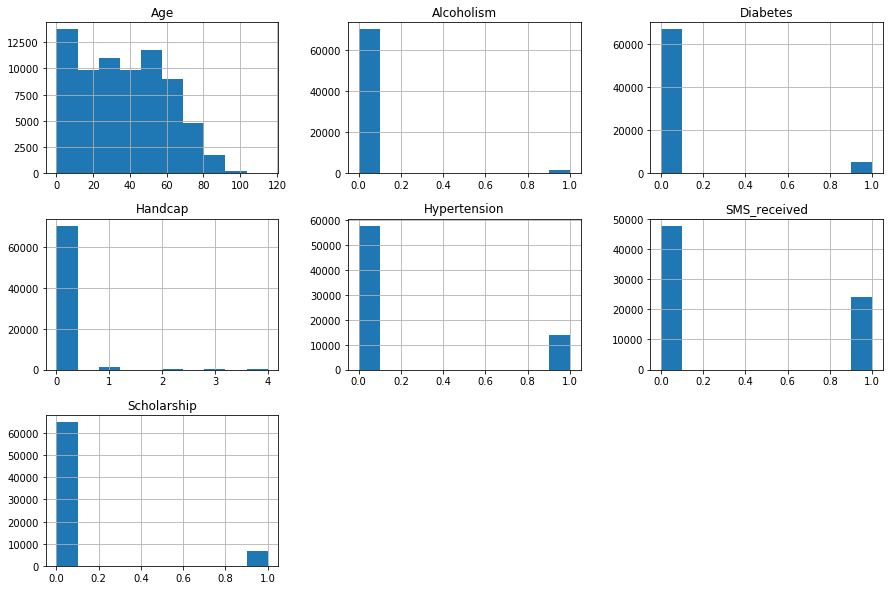

In [353]:
# Use this, and more code cells, to explore your data. Don't forget to add
#   Markdown cells to document your observations and findings.
df.hist(figsize=(15,10));

In [354]:
shown = df["No-show"]== "No"
not_shown = df["No-show"]=="Yes"

In [355]:
sum(shown)

54153

In [356]:
sum(not_shown)

17663

In [357]:
df[shown].mean()

Age             37.229166
Scholarship      0.091334
Hypertension     0.202944
Diabetes         0.072868
Alcoholism       0.023600
Handcap          0.020904
SMS_received     0.297232
dtype: float64

In [358]:
df[not_shown].mean()

Age             34.376267
Scholarship      0.108419
Hypertension     0.170922
Diabetes         0.065108
Alcoholism       0.029440
Handcap          0.017777
SMS_received     0.453094
dtype: float64

# Visual Investigation to find what affect the attendance of the patients

In [359]:
#Creating a function
def investigate(df,column):
    plt.figure(figsize=(10,4))
    df[column][shown].hist(alpha = 0.5, bins= 10, color="red", label="Attended")
    df[column][not_shown].hist(alpha = 0.5, bins= 10,color="blue", label="Absent")
    plt.legend();
    plt.title(f"According to {column}")
    plt.xlabel(column)
    plt.ylabel("Num of patients")


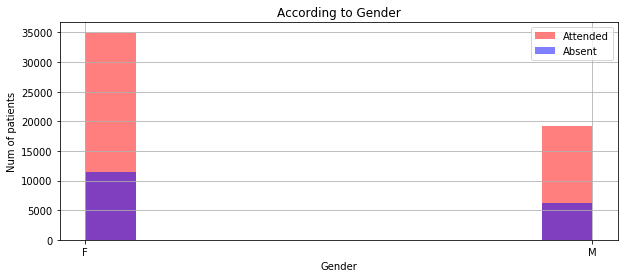

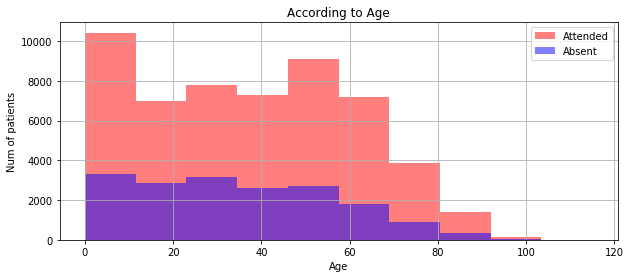

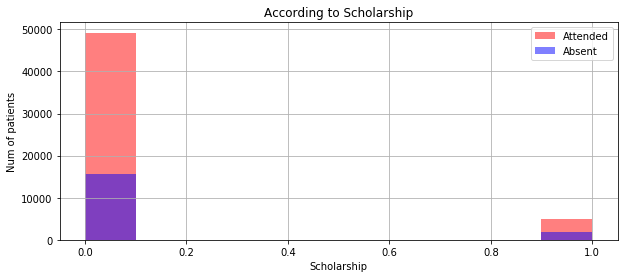

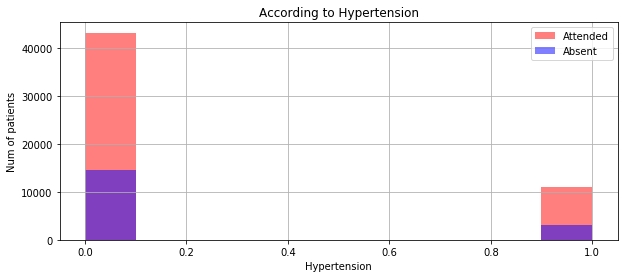

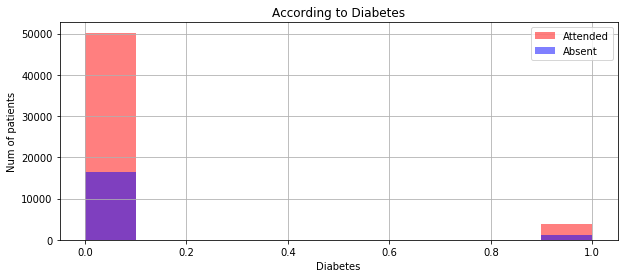

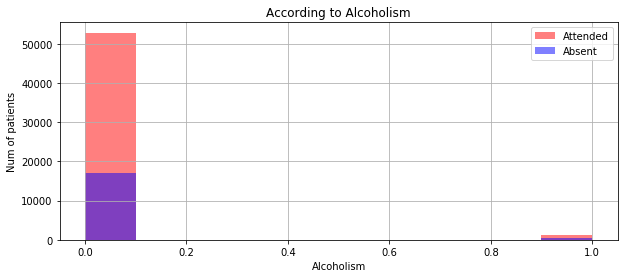

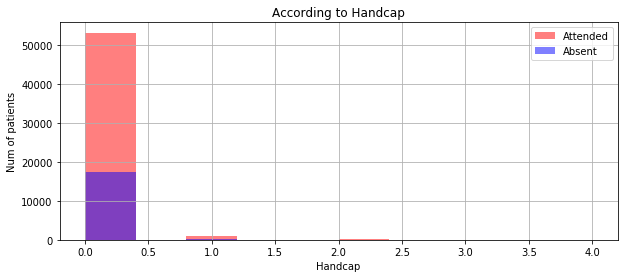

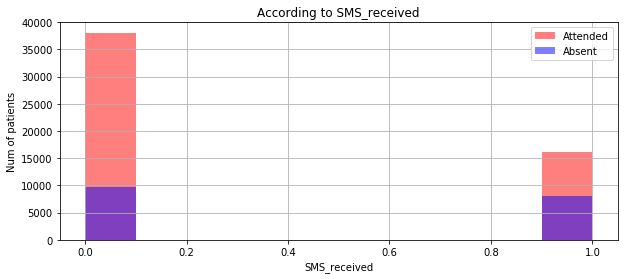

In [360]:
#Investigate Neighbourhood Scholarship Gender
for column in df:
    if column == "Neighbourhood" or column == "No-show": 
        pass
    else:
            investigate(df,column)  

can't detect any effect from any column except the age as younger ages attend more than old ages and the SMS Received
as patients who didn't receive SMSs have a higher attendance percentage more than who received SMSs 
SMSs process should be looked into ... 

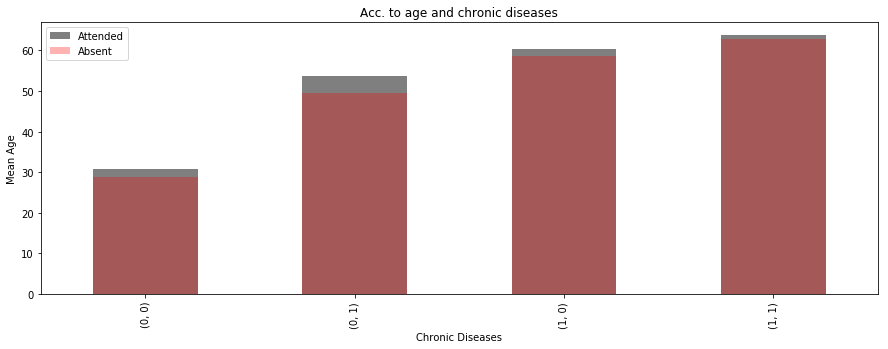

In [361]:
#does age and chronic diseases affect the attendance
shown_chronic = df[shown].groupby(["Hypertension", "Diabetes"]).mean()["Age"]
not_shown_chronic = df[not_shown].groupby(["Hypertension", "Diabetes"]).mean()["Age"]

plt.figure(figsize=[15,5])
shown_chronic.plot(alpha = 0.5, kind="bar", color="black",label= "Attended")
not_shown_chronic.plot(alpha = 0.3 ,kind="bar", color="red", label="Absent")
plt.legend();
plt.title("Acc. to age and chronic diseases")
plt.xlabel("Chronic Diseases")
plt.ylabel("Mean Age");



we can't find any relation between age and chronic diseases with the attendance of the patients 

In [362]:
shown_chronic, not_shown_chronic

(Hypertension  Diabetes
 0             0           30.713360
               1           53.701370
 1             0           60.270517
               1           63.764303
 Name: Age, dtype: float64, Hypertension  Diabetes
 0             0           28.768691
               1           49.481172
 1             0           58.650380
               1           62.913282
 Name: Age, dtype: float64)

Can't detect any effect on the attendence.

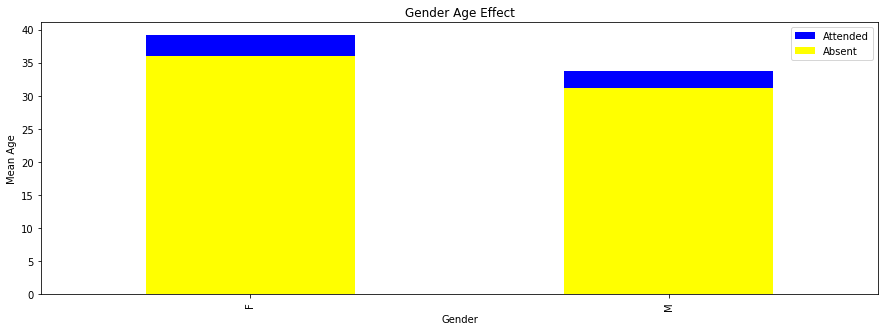

In [363]:
#Gender Age Effect
plt.figure(figsize=(15,5))
df[shown].groupby("Gender").mean()["Age"].plot(kind="bar", color="blue", label="Attended")
df[not_shown].groupby("Gender").mean()["Age"].plot(kind="bar",color="yellow", label= "Absent")
plt.legend();
plt.title("Gender Age Effect")
plt.xlabel("Gender")
plt.ylabel("Mean Age");

In [364]:
df[shown].groupby("Gender").mean()["Age"], df[not_shown].groupby("Gender").mean()["Age"]

(Gender
 F    39.130292
 M    33.766269
 Name: Age, dtype: float64, Gender
 F    36.06501
 M    31.22040
 Name: Age, dtype: float64)

There is no remarkable effect on the attendence .. 

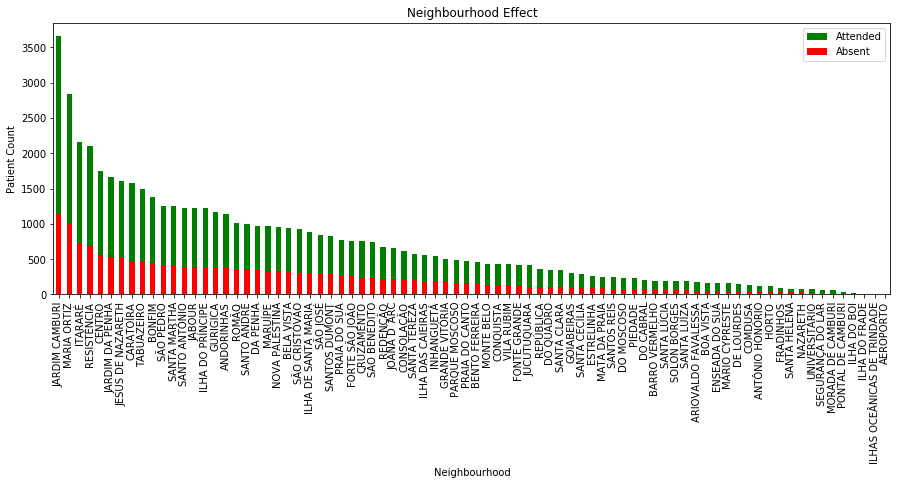

In [367]:
#Neighbourhood effect
shown_neighbourhood = df["Neighbourhood"][shown].value_counts()
not_shown_neighbourhood = df["Neighbourhood"][not_shown].value_counts()

plt.figure(figsize=[15,5]);
shown_neighbourhood.plot(kind="bar", color="green", label="Attended")
not_shown_neighbourhood.plot(kind="bar",color="red", label= "Absent")
plt.legend();
plt.title("Neighbourhood Effect")
plt.xlabel("Neighbourhood")
plt.ylabel("Patient Count");

We can detect that Neighbourhood affect the attendance 


# Conclusions
1- Neighbourhood affects the attendance, Jardim Camburi has the greater attendence rate of all.

2- Age affect the attendence as age from 0:12 has the highest rate and from 80:100 has the lowest attendance rate.

3- There is a strange detection as patients who have received SMSs have lower attendance rate than who haven't received .. SMS process should be looked into 

4-There is no relation between chronic diseases and attendance.


# Limitation 
1-The Data does'nt show the time the SMSs were sent as that might have a huge effect on the process.
2-Some data are categorical and that can't help much in analysis as much as descriptive data.
3-There is no relation between most of the factors included in the data set.


# Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [3]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0